In [119]:
import pandas as pd
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
#from matplotlib.pyplot import subplots, show
import seaborn as sns
from datetime import datetime

Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [120]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.info()
display(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


## Brain Storming and Data Preparation

Objetivo: Predecir la cantidad total reclamada "Total Claim Amount" de un cliente según sus características sociodemográficas y del tipo de póliza, ingresos, coche, etc. 
    

### Data Cleaning and Exploratory Analysis

In [121]:
# Columns of dataset
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [122]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


In [123]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [124]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


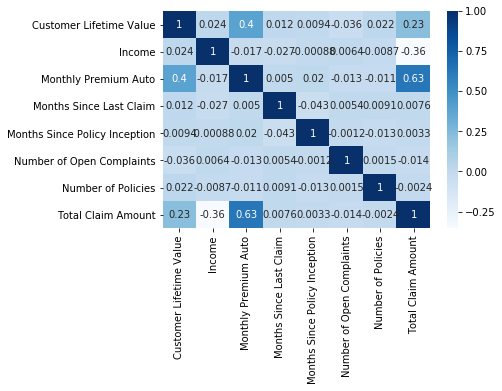

In [125]:
df.corr()
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)

### Categorical Variable

#### Effective To Date

Cambiamos Location Code de tipo

In [126]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].head())

object
0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective To Date, dtype: object


In [127]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [128]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].min())
print(df['Effective To Date'].max())
print(df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())

datetime64[ns]
2011-01-01 00:00:00
2011-02-28 00:00:00
2011    9134
Name: Effective To Date, dtype: int64
1    4898
2    4236
Name: Effective To Date, dtype: int64


#### Customers
Unique value for each customer

In [129]:
print('type', df.Customer.dtype)
print(df.Customer.head())
print(len(df.Customer.unique()))

type object
0    BU79786
1    QZ44356
2    AI49188
3    WW63253
4    HB64268
Name: Customer, dtype: object
9134


#### State



In [130]:
print('type', df.State.dtype)
print(df.State.unique())
print(len(df.State.unique()))
print((df.State.value_counts()/ sum(df.State.value_counts()))*100)
a =df.State.value_counts()

type object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64


#### Response
'Response' is a categorical variable:
No     85.7%
Yes    14.3%

In [131]:
print('type', df['Response'].dtype)
print(df['Response'].unique())
print((df.Response.value_counts()/sum(df.State.value_counts()))*100)

type object
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: Response, dtype: float64


#### Coverage
'Coverage' is a categorical variable, with 3 categories (type of coverage): <br>
Basic       61% <br>
Extended    30% <br>
Premium      9% <br>

In [132]:
print('type', df.Coverage.dtype)
print(df.Coverage.unique())
print(len(df.Coverage.unique()))
print((df.Coverage.value_counts()/ sum(df.Coverage.value_counts()))*100)

type object
['Basic' 'Extended' 'Premium']
3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64


#### Education
'Education' is a categorical variable, with 5 categories (type of education): <br>
Bachelor                30% <br>
College                 29.3%  <br>
High School or Below    28.7% <br>
Master                   8% <br>
Doctor                   3% <br>

In [133]:
print('type', df.Education.dtype)
print(df.Education.unique())
print(len(df.Education.unique()))
print((df.Education.value_counts()/ sum(df.Education.value_counts()))*100)

type object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64


#### EmploymentStatus

In [134]:
print('type', df.EmploymentStatus.dtype)
print(df.EmploymentStatus.unique())
print(len(df.EmploymentStatus.unique()))
print((df.EmploymentStatus.value_counts()/ sum(df.EmploymentStatus.value_counts()))*100)

type object
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
5
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64


#### Gender

In [135]:
print('type', df.Gender.dtype)
print(df.Gender.unique())
print(len(df.Gender.unique()))
print((df.Gender.value_counts()/ sum(df.Gender.value_counts()))*100)

type object
['F' 'M']
2
F    50.996278
M    49.003722
Name: Gender, dtype: float64


#### Location Code 

In [136]:
print('type', df['Location Code'].dtype)
print(df['Location Code'].unique())
print(len(df['Location Code'].unique()))
print((df['Location Code'].value_counts()/ sum(df['Location Code'].value_counts()))*100)

type object
['Suburban' 'Rural' 'Urban']
3
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: Location Code, dtype: float64


#### Marital Status

In [137]:
print('type', df['Marital Status'].dtype)
print(df['Marital Status'].unique())
print(len(df['Marital Status'].unique()))
print((df['Marital Status'].value_counts()/ sum(df['Marital Status'].value_counts()))*100)

type object
['Married' 'Single' 'Divorced']
3
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: Marital Status, dtype: float64


#### Policy Type

In [138]:
print('type', df['Policy Type'].dtype)
print(df['Policy Type'].unique())
print(len(df['Policy Type'].unique()))
print((df['Policy Type'].value_counts()/ sum(df['Policy Type'].value_counts()))*100)

type object
['Corporate Auto' 'Personal Auto' 'Special Auto']
3
Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: Policy Type, dtype: float64


#### Policy

In [139]:
print('type', df['Policy'].dtype)
print(df['Policy'].unique())
print(len(df['Policy'].unique()))
print((df['Policy'].value_counts()/ sum(df['Policy'].value_counts()))*100)

type object
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
9
Personal L3     37.508211
Personal L2     23.231881
Personal L1     13.575651
Corporate L3    11.101379
Corporate L2     6.514123
Corporate L1     3.930370
Special L2       1.795489
Special L3       1.620320
Special L1       0.722575
Name: Policy, dtype: float64


#### Renew Offer Type

In [140]:
print('type', df['Renew Offer Type'].dtype)
print(df['Renew Offer Type'].unique())
print(len(df['Renew Offer Type'].unique()))
print((df['Renew Offer Type'].value_counts()/ sum(df['Renew Offer Type'].value_counts()))*100)

type object
['Offer1' 'Offer3' 'Offer2' 'Offer4']
4
Offer1    41.077294
Offer2    32.034158
Offer3    15.677688
Offer4    11.210861
Name: Renew Offer Type, dtype: float64


#### Sales Channel

In [141]:
print('type', df['Sales Channel'].dtype)
print(df['Sales Channel'].unique())
print(len(df['Sales Channel'].unique()))
print((df['Sales Channel'].value_counts()/ sum(df['Sales Channel'].value_counts()))*100)

type object
['Agent' 'Call Center' 'Web' 'Branch']
4
Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: Sales Channel, dtype: float64


#### Vehicle Class

In [142]:
print('type', df['Vehicle Class'].dtype)
print(df['Vehicle Class'].unique())
print(len(df['Vehicle Class'].unique()))
print((df['Vehicle Class'].value_counts()/ sum(df['Vehicle Class'].value_counts()))*100)

type object
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
6
Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: Vehicle Class, dtype: float64


#### Vehicle Size

In [143]:
print('type', df['Vehicle Size'].dtype)
print(df['Vehicle Size'].unique())
print(len(df['Vehicle Size'].unique()))
print((df['Vehicle Size'].value_counts()/ sum(df['Vehicle Size'].value_counts()))*100)

type object
['Medsize' 'Small' 'Large']
3
Medsize    70.330633
Small      19.312459
Large      10.356908
Name: Vehicle Size, dtype: float64


### Data Visualization

#### Categorical Variable

IndexError: index 2 is out of bounds for axis 0 with size 2

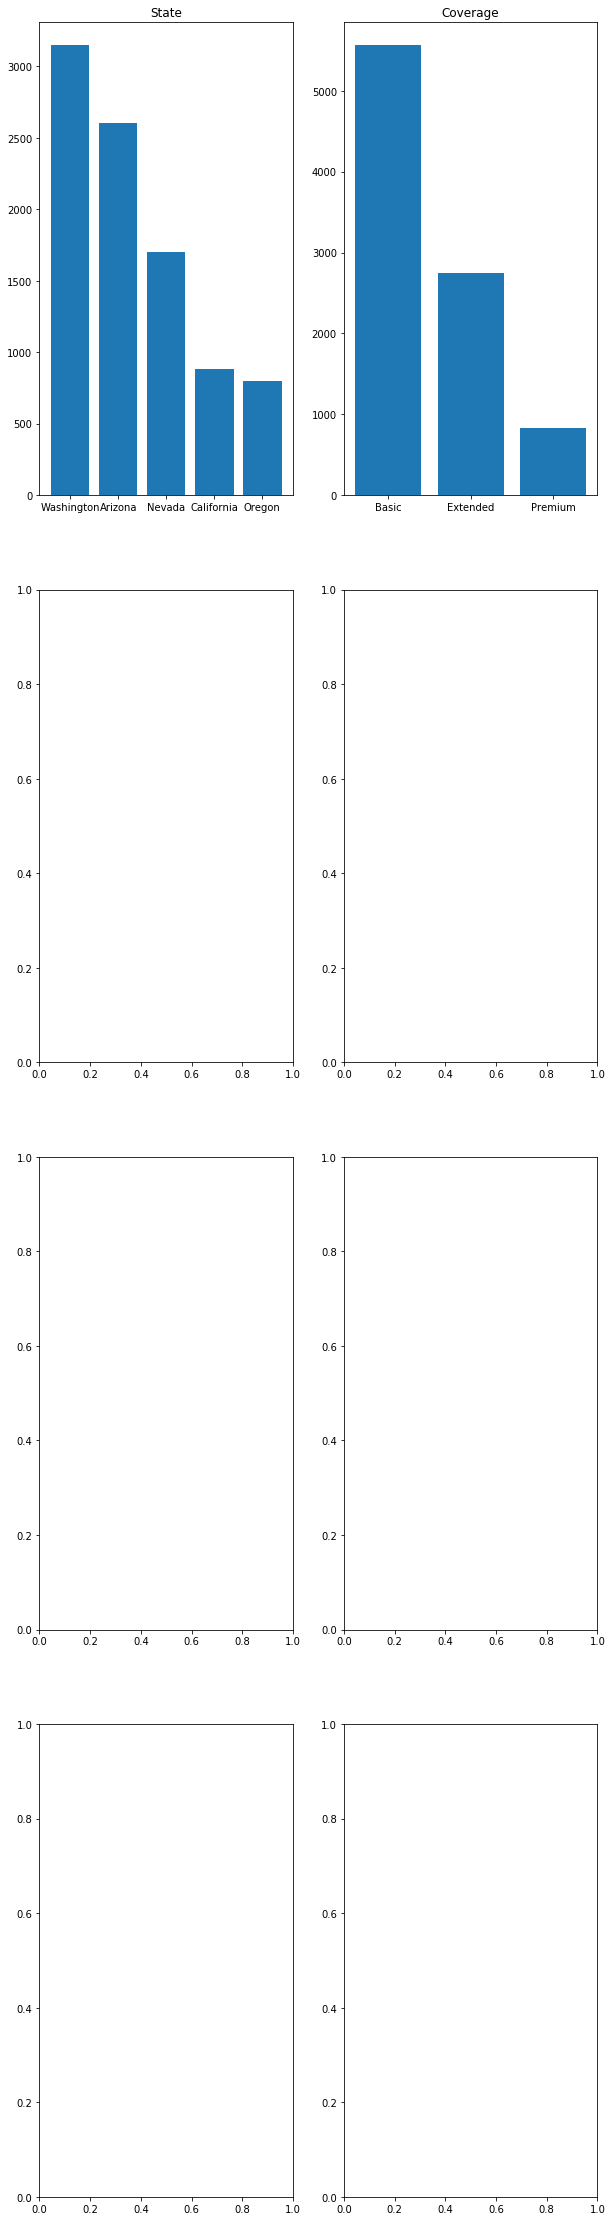

In [118]:
y = [col for col in df.columns if (col != 'Customer') and (df[col].dtype == object)]
fig, axes = plt.subplots(int((len(y)/2)), 2, figsize=(10,40))
for i, x in enumerate(y):
    axes[int(i/2)][i%2].bar(df[x].unique(), df[x].value_counts())
    axes[int(i/2)][i%2].set_title(x)

### Columns - Numerical Variable

#### Customer Lifetime Value
The values are numerical, they present an asymmetry, as reflected in the following histogram. The maximum value is 83,325 and the minimum is 1898 with an average of 8004.

In [ ]:
print('type', df['Customer Lifetime Value'].dtype)
print(df['Customer Lifetime Value'].head())
print('max', df['Customer Lifetime Value'].max())
print('min', df['Customer Lifetime Value'].min())
print('mean', df['Customer Lifetime Value'].mean())

In [ ]:
sns.distplot(df['Customer Lifetime Value'], bins=30, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)



#### Income

In [ ]:
print('type', df.Income.dtype)
print(df.Income.head())
print('max', df.Income.max())
print('min', df.Income.min())
print('mean', df.Income.mean())

In [ ]:
sns.distplot(df['Income'], bins=15, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)





#### Monthly Premium Auto

In [ ]:
print('type', df['Monthly Premium Auto'].dtype)
print(df['Monthly Premium Auto'].head())
print('max', df['Monthly Premium Auto'].max())
print('min', df['Monthly Premium Auto'].min())
print('mean', df['Monthly Premium Auto'].mean())

In [ ]:
sns.distplot(df['Monthly Premium Auto'], bins=15, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)


In [ ]:
Months Since Last Claim         
Months Since Policy Inception    
Number of Open Complaints        
Number of Policies               
Policy Type                     
Policy                           
Renew Offer Type                 
Sales Channel                   
Total Claim Amount               
Vehicle Class                    
Vehicle Size                     

In [ ]:
Months Since Last Claim         
